In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datathon/TDHospital/TD_HOSPITAL_TRAIN.csv')
df.head(10)

,timeknown,cost,reflex,sex,blood,bloodchem1,bloodchem2,temperature,race,heart,...,diabetes,income,extraprimary,bloodchem6,education,psych5,psych6,information,cancer,death
0,4.0,3008.38867,11.228005,male,20.699219,2.199707,1.299805,35.59375,white,103.0,...,0.0,$11-$25k,COPD/CHF/Cirrhosis,167.5000,20.000000,30.000000,2.000,0.0,no,1.0
1,467.0,23585.89060,9.714861,M,9.398438,NaN,0.699951,39.00000,white,50.0,...,0.0,>$50k,Cancer,480.0000,16.000000,11.500000,1.000,10.0,metastatic,1.0
2,533.0,4046.45898,11.353296,Male,19.296875,NaN,1.599854,38.19531,white,50.0,...,1.0,under $11k,ARF/MOSF,177.1250,5.000000,18.000000,0.000,5.0,yes,0.0
3,68.0,NaN,9.269058,female,7.500000,2.500000,0.599976,37.59375,white,80.0,...,0.0,$11-$25k,COPD/CHF/Cirrhosis,NaN,12.000000,7.000000,1.839,12.0,no,1.0
4,1605.0,6457.70703,8.655387,female,15.099609,4.399414,0.699951,35.69531,white,114.0,...,0.0,under $11k,COPD/CHF/Cirrhosis,233.3125,2.000000,7.000000,6.000,12.0,no,0.0
5,15.0,NaN,9.037731,female,15.298828,3.199707,1.000000,36.59375,white,118.0,...,0.0,NaN,ARF/MOSF,167.5000,12.000000,47.000000,0.000,13.0,no,1.0
6,713.0,1664.37988,12.431059,Male,13.798828,4.000000,0.899902,36.00000,white,71.0,...,0.0,under $11k,Cancer,276.1875,8.000000,4.000000,0.000,3.0,metastatic,1.0
7,1475.0,2440.39844,9.355022,female,3.199707,2.000000,0.899902,36.50000,white,62.0,...,0.0,under $11k,ARF/MOSF,165.6875,54.865518,48.000000,0.000,8.0,metastatic,0.0
8,5.0,17679.00000,10.720581,male,0.199982,2.299805,0.599976,39.39844,black,115.0,...,0.0,$25-$50k,ARF/MOSF,120.0000,12.000000,52.000000,2.000,5.0,yes,1.0
9,20.0,NaN,10.511660,female,9.699219,3.299805,1.199951,36.19531,white,70.0,...,1.0,under $11k,ARF/MOSF,200.0000,12.000000,24.666656,6.000,2.0,yes,1.0


In [ ]:
# Check and print the sum of null values in each column
null_values_sum = df.isna().sum()

# Print the result
print(null_values_sum)


timeknown               0
cost                 2705
reflex                  0
sex                     0
blood                 161
bloodchem1           2591
bloodchem2             44
temperature             0
race                   32
heart                   0
psych1                  0
glucose              3525
psych2               2245
dose                    0
psych3                  0
bp                      0
bloodchem3           2012
confidence            166
bloodchem4           3403
comorbidity             0
totalcost             687
breathing               0
age                     0
sleep                1792
dnr                    26
bloodchem5           1749
pdeath               7058
meals                   0
pain                    0
primary                 0
psych4               4334
disability           1102
administratorcost     139
urine                3794
diabetes                0
income               2275
extraprimary            0
bloodchem6           1793
education   

# **Introduction**
In this project we found that the dataset provided was missing a lot of values which was causing trouble for helping with the prediction of the modal.
Furthermore, we also see that the many value of the gender are not consistent (eg: male, M,...). Implementing a machine learning modal without dealing with such inconsistancy can cause the algorithm to fail, such as the starting code.


To deal with this, we decide to test implementing different algorithm as well as fixing the data for a better dataset.

# **Preprocess**
For processing the data, we decide to experiment 4 different ways to process the missing value.



1.   For this first method, we decide to fill in the numeric missing value by calculating the mean of the dataset. For the non-numeric value we choose to fill in the missing values with the most common values.

2.   For this second method, we decide to fill in the numeric missing value by calculating the median of the dataset. For the non-numeric value we choose to fill in the missing values with the most common values.

3.   For this third method, we decide to fill in the numeric missing value by calculating the mean of the dataset. For the non-numeric value we choose to fill in the missing values with the values "Unknown".

4.   For this third method, we decide to fill in the numeric missing value by calculating the median of the dataset. For the non-numeric value we choose to fill in the missing values with the values "Unknown".






In [ ]:
# preprocess data: lower case word, null values, handle catogorical val

import re

def preprocess_df_type1(df): # mean-mode
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    threshold = df.shape[0] / 2
    # Drop column that exceeds the threshold
    columns_to_drop = [col for col in df.columns if df[col].isna().sum() > threshold]

    if columns_to_drop:
        df = df.drop(columns=columns_to_drop)
    columns_to_fill_with_mean = ['cost', 'bloodchem1', 'bloodchem2','bloodchem3', 'bloodchem4', 'bloodchem5', 'bloodchem6', 'blood', 'glucose', 'psych2', 'confidence', 'totalcost', 'sleep', 'administratorcost', 'education', 'psych5', 'information']


    for column in columns_to_fill_with_mean:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    columns_to_fill_with_mode = ['race', 'dnr', 'disability', 'income']
    for column in columns_to_fill_with_mode:
        mode_value = df[column].mode()[0]  # Calculate the mode for each column
        df[column].fillna(mode_value, inplace=True)

    # handle cateogrical
    # Using regex to handle unstructured data in gender
    df['sex'] = df['sex'].replace({'m': 1, 'male': 1, '1': 1})
    df['sex'] = df['sex'].replace({'female': 2, 'f': 2})
    # change to binary
    Col_to_int = ['diabetes', 'death', 'psych3']
    df[Col_to_int] = df[Col_to_int].astype(int)
    return df

def preprocess_df_type2(df): # median-mode
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    threshold = df.shape[0] / 2
    # Check if the number of null values in each column exceeds the threshold
    columns_to_drop = [col for col in df.columns if df[col].isna().sum() > threshold]

    if columns_to_drop:
        df = df.drop(columns=columns_to_drop)
    columns_to_fill_with_median = ['cost', 'bloodchem1', 'bloodchem2','bloodchem3', 'bloodchem4', 'bloodchem5', 'bloodchem6', 'blood', 'glucose', 'psych2', 'confidence', 'totalcost', 'sleep', 'administratorcost', 'education', 'psych5', 'information']


    for column in columns_to_fill_with_median:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

    columns_to_fill_with_mode = ['race', 'dnr', 'disability', 'income']
    for column in columns_to_fill_with_mode:
        mode_value = df[column].mode()[0]  # Calculate the mode for each column
        df[column].fillna(mode_value, inplace=True)

    # handle cateogrical
    # Using regex
    df['sex'] = df['sex'].replace({'m': 1, 'male': 1, '1': 1})
    df['sex'] = df['sex'].replace({'female': 2, 'f': 2})
    # change to binary
    Col_to_int = ['diabetes', 'death', 'psych3']
    df[Col_to_int] = df[Col_to_int].astype(int)
    return df

def preprocess_df_type3(df): # mean-unknown
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    threshold = df.shape[0] / 2
    columns_to_drop = [col for col in df.columns if df[col].isna().sum() > threshold]

    if columns_to_drop:
        df = df.drop(columns=columns_to_drop)
    columns_to_fill_with_mean = ['cost', 'bloodchem1', 'bloodchem2','bloodchem3', 'bloodchem4', 'bloodchem5', 'bloodchem6', 'blood', 'glucose', 'psych2', 'confidence', 'totalcost', 'sleep', 'administratorcost', 'education', 'psych5', 'information']


    for column in columns_to_fill_with_mean:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    columns_to_fill_with_unknown = ['race', 'dnr', 'disability', 'income']
    filled_value = 'unknown'
    for column in columns_to_fill_with_unknown:
        df[column].fillna(filled_value, inplace=True)

    # handle cateogrical
    # Using regex
    df['sex'] = df['sex'].replace({'m': 1, 'male': 1, '1': 1})
    df['sex'] = df['sex'].replace({'female': 2, 'f': 2})
    # change to binary
    Col_to_int = ['diabetes', 'death', 'psych3']
    df[Col_to_int] = df[Col_to_int].astype(int)
    return df

def preprocess_df_type4(df): # median-unknown
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    threshold = df.shape[0] / 2
    columns_to_drop = [col for col in df.columns if df[col].isna().sum() > threshold]

    if columns_to_drop:
        df = df.drop(columns=columns_to_drop)
    columns_to_fill_with_median = ['cost', 'bloodchem1', 'bloodchem2','bloodchem3', 'bloodchem4', 'bloodchem5', 'bloodchem6', 'blood', 'glucose', 'psych2', 'confidence', 'totalcost', 'sleep', 'administratorcost', 'education', 'psych5', 'information']


    for column in columns_to_fill_with_median:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

    columns_to_fill_with_unknown = ['race', 'dnr', 'disability', 'income']
    filled_value = 'unknown'
    for column in columns_to_fill_with_unknown:
        df[column].fillna(filled_value, inplace=True)

    # handle cateogrical
    # Using regex
    df['sex'] = df['sex'].replace({'m': 1, 'male': 1, '1': 1})
    df['sex'] = df['sex'].replace({'female': 2, 'f': 2})
    # change to binary
    Col_to_int = ['diabetes', 'death', 'psych3']
    df[Col_to_int] = df[Col_to_int].astype(int)
    # income
    return df

# **Encoding**


In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    columns_to_encode = ['race', 'dnr', 'primary', 'disability', 'income', 'extraprimary', 'cancer']
    encoding_dict = {}
    label_encoder = LabelEncoder()
    for col in columns_to_encode:
        df[col] = label_encoder.fit_transform(df[col])
        encoding_dict[col] = {category: encoding for encoding, category in enumerate(label_encoder.classes_)}
    return encoding_dict

# Call the function to perform encoding
encoding_dict = encode_categorical_columns(df)

# Print the encoding_dict
print(encoding_dict)



{'race': {'asian': 0, 'black': 1, 'hispanic': 2, 'other': 3, 'white': 4, nan: 5}, 'dnr': {'dnr after sadm': 0, 'dnr before sadm': 1, 'no dnr': 2, nan: 3}, 'primary': {'ARF/MOSF w/Sepsis': 0, 'CHF': 1, 'COPD': 2, 'Cirrhosis': 3, 'Colon Cancer': 4, 'Coma': 5, 'Lung Cancer': 6, 'MOSF w/Malig': 7}, 'disability': {'<2 mo. follow-up': 0, 'Coma or Intub': 1, 'SIP>=30': 2, 'adl>=4 (>=5 if sur)': 3, 'no(M2 and SIP pres)': 4, nan: 5}, 'income': {'$11-$25k': 0, '$25-$50k': 1, '>$50k': 2, 'under $11k': 3, nan: 4}, 'extraprimary': {'ARF/MOSF': 0, 'COPD/CHF/Cirrhosis': 1, 'Cancer': 2, 'Coma': 3}, 'cancer': {'metastatic': 0, 'no': 1, 'yes': 2}}


# **Splitting the dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_dataset(df, test_size=0.3, random_state=None):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1].values

    # Split the dataset into training and the rest
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Split the remaining data into validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=random_state)

    return X_train, y_train, X_val, y_val, X_test, y_test


# **Visualization**

Top 10 correlated feature are: 
death           1.000000
timeknown       0.663369
disability      0.436235
dnr             0.349898
primary         0.256155
extraprimary    0.159801
psych2          0.151278
psych6          0.148417
information     0.142377
psych4          0.122657
cancer          0.112039
Name: death, dtype: float64


<ipython-input-61-0a525ade772a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


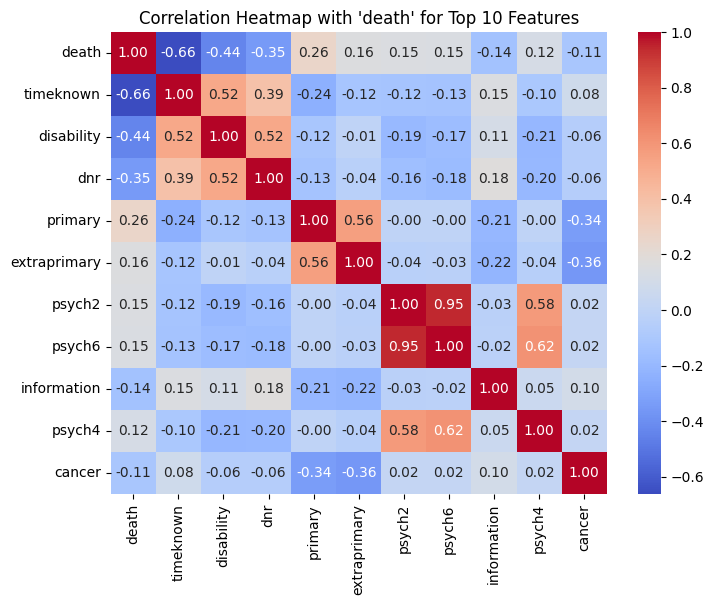

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def Top10correlatedfeature(df):
    # Calculate correlations
    correlations = df.corr()
    correlation_with_death = correlations['death']

    # Sort the correlations in descending order and select the top 10 features
    top_correlations = correlation_with_death.abs().nlargest(11)

    # Print the sorted correlations
    print("Top 10 correlated feature are: ")
    print(top_correlations)

    # Create a heatmap for the top 10 features
    top_features = top_correlations.index
    top_correlation_matrix = correlations.loc[top_features, top_features]

    plt.figure(figsize=(8, 6))
    sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap with 'death' for Top 10 Features")
    plt.show()

    return top_correlations

# Call the function and get the top 10 correlated features
top_10_correlations = Top10correlatedfeature(df)


# **Model**

We implement on 4 models to compare which one has the highest accuracy

In [ ]:
# Class that contain 4 models: NN, linear regression, random forest classifier, XGBoost
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

class Model:
    def __init__(self, X_train, y_train, X_val, y_val, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.X_test = X_test
        self.y_test = y_test

    def train_and_evaluate_neural_network(self):
        model = keras.Sequential([
            layers.Input(shape=(self.X_train.shape[1],)),  # Input layer
            layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
            layers.Dense(64, activation='relu'),  # Another hidden layer with 64 neurons and ReLU activation
            layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(self.X_train, self.y_train, epochs=20, batch_size=32, validation_data=(self.X_val, self.y_val))
        test_loss, test_accuracy = model.evaluate(self.X_test, self.y_test)
        return test_accuracy

    def train_linear_regression(self):
        model = LinearRegression().fit(self.X_train, self.y_train)
        r_squared = model.score(self.X_test, self.y_test)
        return r_squared

    def train_random_forest(self, random_state=5):
        rf = RandomForestClassifier(criterion="entropy", random_state=random_state,
                                    n_estimators= 120, min_samples_split=5,
                                    min_samples_leaf= 1, max_samples=0.75,
                                    max_features=0.2, bootstrap=True)
        rf.fit(self.X_train, self.y_train)
        RDF_y_pred = rf.predict(self.X_test)
        test_accuracy = accuracy_score(self.y_test, RDF_y_pred)
        return test_accuracy, rf

    def train_xgboost(self):
       xgb_model = xgb.XGBClassifier()
       xgb_model.fit(self.X_train, self.y_train)
       xgb_y_pred = xgb_model.predict(self.X_test)
       test_accuracy = accuracy_score(self.y_test, xgb_y_pred)
       return test_accuracy, xgb_model





# **Multithreading**

In this part, we want to know which preprocessing method would result in the highest accuracy. Therefore, we integrate Multithreading to run each preprocessing concurrently

<function preprocess_df_type1 at 0x7f2ceaaf5870>
Epoch 1/20
155/155 [==============================] - 1s 4ms/step - loss: 252.4419 - accuracy: 0.6530 - val_loss: 58.9992 - val_accuracy: 0.7901
Epoch 2/20
155/155 [==============================] - 1s 3ms/step - loss: 110.2021 - accuracy: 0.7304 - val_loss: 197.0519 - val_accuracy: 0.4534
Epoch 3/20
155/155 [==============================] - 1s 3ms/step - loss: 87.3088 - accuracy: 0.7522 - val_loss: 52.4238 - val_accuracy: 0.8084
Epoch 4/20
155/155 [==============================] - 0s 3ms/step - loss: 114.9143 - accuracy: 0.7391 - val_loss: 66.7307 - val_accuracy: 0.7996
Epoch 5/20
155/155 [==============================] - 1s 3ms/step - loss: 70.2438 - accuracy: 0.7838 - val_loss: 72.9313 - val_accuracy: 0.7105
Epoch 6/20
155/155 [==============================] - 1s 4ms/step - loss: 77.1807 - accuracy: 0.7834 - val_loss: 65.3714 - val_accuracy: 0.7281
Epoch 7/20
155/155 [==============================] - 1s 3ms/step - loss: 111.5690 

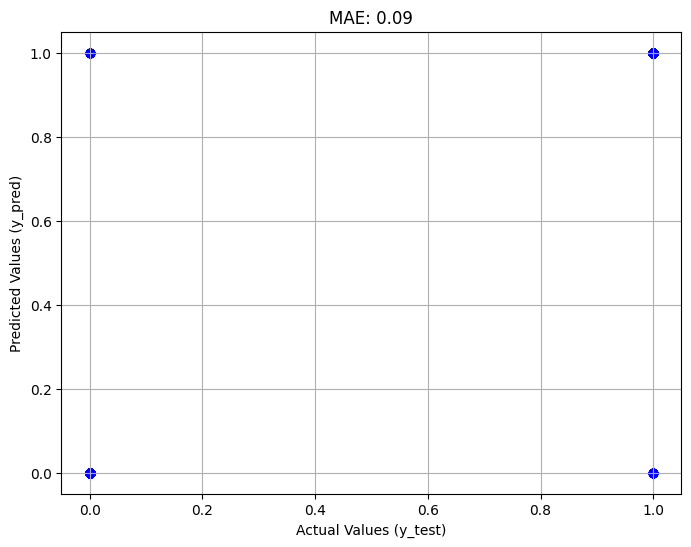

XGBoost Test accuracy: 0.9166666666666666
<function preprocess_df_type2 at 0x7f2ceaaf4f70>
Epoch 1/20
155/155 [==============================] - 2s 5ms/step - loss: 247.4294 - accuracy: 0.5704 - val_loss: 104.2918 - val_accuracy: 0.7274
Epoch 2/20
155/155 [==============================] - 1s 3ms/step - loss: 143.0819 - accuracy: 0.6994 - val_loss: 184.2158 - val_accuracy: 0.7260
Epoch 3/20
155/155 [==============================] - 0s 3ms/step - loss: 139.8681 - accuracy: 0.7053 - val_loss: 96.8006 - val_accuracy: 0.7908
Epoch 4/20
155/155 [==============================] - 1s 4ms/step - loss: 113.5525 - accuracy: 0.7453 - val_loss: 490.1225 - val_accuracy: 0.4339
Epoch 5/20
155/155 [==============================] - 0s 3ms/step - loss: 190.8992 - accuracy: 0.7275 - val_loss: 41.9397 - val_accuracy: 0.8266
Epoch 6/20
155/155 [==============================] - 0s 3ms/step - loss: 68.8888 - accuracy: 0.7751 - val_loss: 41.7052 - val_accuracy: 0.8205
Epoch 7/20
155/155 [=================

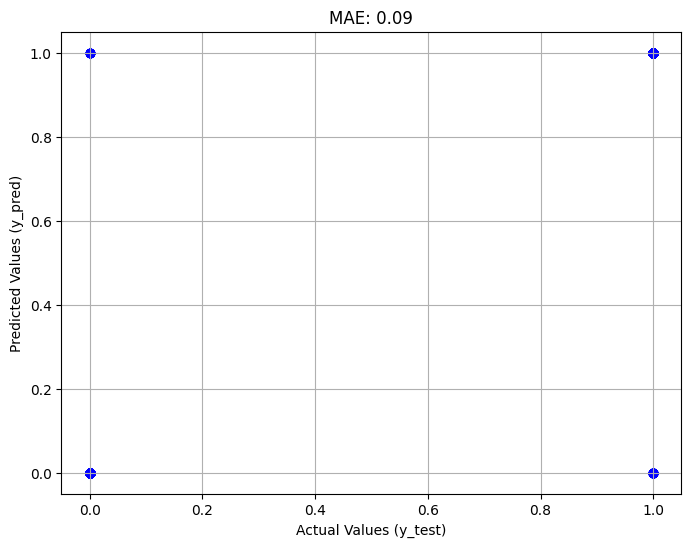

XGBoost Test accuracy: 0.89937106918239
<function preprocess_df_type3 at 0x7f2ceaaf7520>
Epoch 1/20
155/155 [==============================] - 1s 4ms/step - loss: 310.6178 - accuracy: 0.5779 - val_loss: 273.9162 - val_accuracy: 0.4480
Epoch 2/20
155/155 [==============================] - 1s 4ms/step - loss: 152.2037 - accuracy: 0.6808 - val_loss: 204.2490 - val_accuracy: 0.7422
Epoch 3/20
155/155 [==============================] - 1s 3ms/step - loss: 112.2326 - accuracy: 0.7387 - val_loss: 31.0871 - val_accuracy: 0.8408
Epoch 4/20
155/155 [==============================] - 0s 3ms/step - loss: 114.6599 - accuracy: 0.7466 - val_loss: 169.0782 - val_accuracy: 0.7517
Epoch 5/20
155/155 [==============================] - 0s 3ms/step - loss: 112.3798 - accuracy: 0.7591 - val_loss: 133.5377 - val_accuracy: 0.7551
Epoch 6/20
155/155 [==============================] - 0s 3ms/step - loss: 125.1108 - accuracy: 0.7538 - val_loss: 210.5440 - val_accuracy: 0.7861
Epoch 7/20
155/155 [================

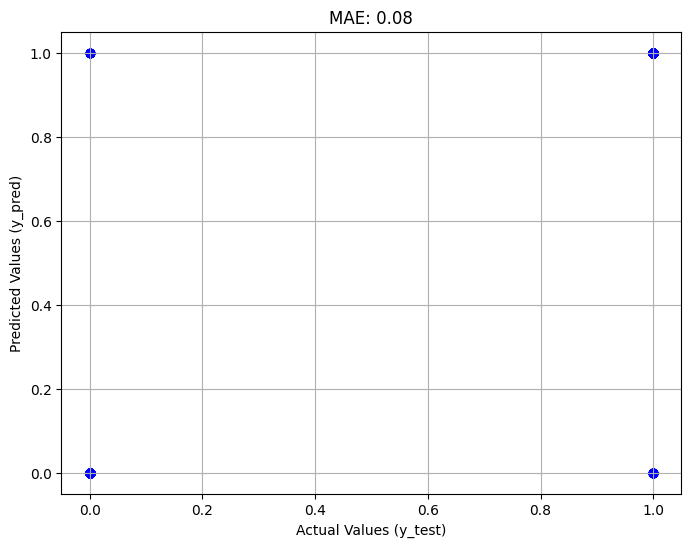

XGBoost Test accuracy: 0.910377358490566
<function preprocess_df_type4 at 0x7f2ceaaf6830>
Epoch 1/20
155/155 [==============================] - 1s 4ms/step - loss: 250.6200 - accuracy: 0.5860 - val_loss: 244.9495 - val_accuracy: 0.7105
Epoch 2/20
155/155 [==============================] - 0s 3ms/step - loss: 169.2984 - accuracy: 0.6909 - val_loss: 277.5750 - val_accuracy: 0.4717
Epoch 3/20
155/155 [==============================] - 0s 3ms/step - loss: 139.6414 - accuracy: 0.7275 - val_loss: 95.6797 - val_accuracy: 0.7159
Epoch 4/20
155/155 [==============================] - 0s 3ms/step - loss: 193.9883 - accuracy: 0.7063 - val_loss: 121.0643 - val_accuracy: 0.7584
Epoch 5/20
155/155 [==============================] - 1s 3ms/step - loss: 141.7394 - accuracy: 0.7480 - val_loss: 80.4263 - val_accuracy: 0.7821
Epoch 6/20
155/155 [==============================] - 1s 4ms/step - loss: 82.9881 - accuracy: 0.7830 - val_loss: 164.8759 - val_accuracy: 0.7395
Epoch 7/20
155/155 [=================

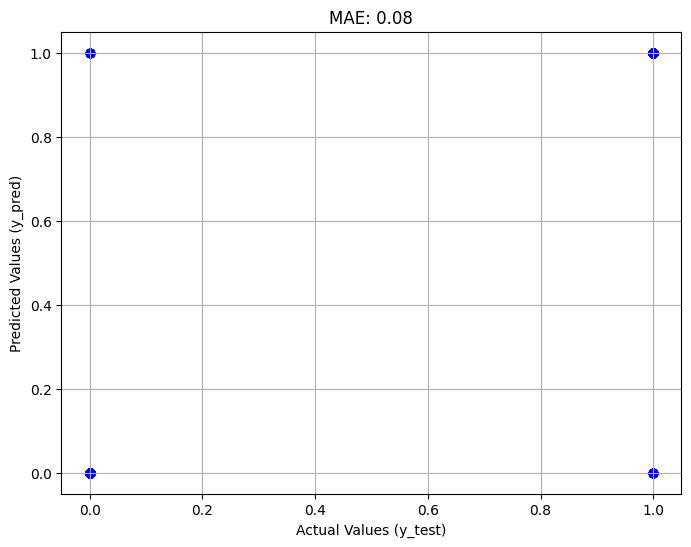

XGBoost Test accuracy: 0.9261006289308176


In [ ]:
import concurrent.futures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define the functions to preprocess the data
preprocess_functions = [preprocess_df_type1, preprocess_df_type2, preprocess_df_type3, preprocess_df_type4]

# Function to preprocess data using a specific function
def preprocess_data(data, preprocess_function):
    processed_df = preprocess_function(data)
    return processed_df


def run_model(df):
    encode_categorical_columns(df)
    X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(df, test_size=0.3, random_state=None)
    model = Model(X_train, y_train, X_val, y_val, X_test, y_test)

    # Train and evaluate the neural network
    test_accuracy_nn = model.train_and_evaluate_neural_network()
    print(f'Neural Network Test accuracy: {test_accuracy_nn}')

    # Train and evaluate the Linear Regression model
    r_squared_score = model.train_linear_regression()
    print(f'Linear Regression R-squared score: {r_squared_score}')

    # Train and evaluate the Random Forest model
    test_accuracy_rf, rf = model.train_random_forest(random_state = 5)
    print(f'Random Forest Test accuracy: {test_accuracy_rf}')


    y_pred = rf.predict(X_test)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Create a scatter plot to visualize the actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.title(f"MAE: {mae:.2f}")
    plt.grid(True)
    plt.show()

    # Train and evaluate the XGBoost model
    test_accuracy_xgb, xgb_model = model.train_xgboost()
    print(f'XGBoost Test accuracy: {test_accuracy_xgb}')


# Create a ThreadPoolExecutor with 4 threads
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    for preprocess_function in preprocess_functions:
        print(preprocess_function)
        # Submit each preprocessing function to run sequentially with custom processing
        future = executor.submit(preprocess_data, df, preprocess_function)
        processed_df = future.result()  # Get the result from the thread
        run_model(processed_df)  # Call your custom function here


